## Componentes de uma série temporal

Conforme apresentamos no 1º Notebook, a primeira coisa a fazer em qualquer análise de dados é plotar os dados (Hyndman e Athanasopoulos, 2022). A análise gráfica permitem visualizar o comportamento dos dados ao longo do tempo e, em muitas situações, constitui a primeira ferramenta à disposição do analista para identificar padrões.


Os componentes comuns na grande maioria das séries temporais são:

**Tendência**
> Uma tendência existe quando há um aumento ou diminuição de longo prazo nos dados. Não precisa ser linear. Às vezes, nos referimos a uma tendência como “mudança de direção”, quando ela pode passar de uma tendência crescente para uma tendência decrescente.

**Sazonalidade**
> Um padrão sazonal ocorre quando uma série temporal é afetada por fatores sazonais, como a época do ano ou o dia da semana. A sazonalidade é sempre de um período fixo e conhecido. 

**Cíclo**
> Um ciclo ocorre quando os dados exibem subidas e descidas que não são de frequência fixa. Essas flutuações geralmente são devidas a condições econômicas e muitas vezes estão relacionadas ao “ciclo de negócios”. A duração dessas flutuações é geralmente de pelo menos 2 anos.
Muitas pessoas confundem comportamento cíclico com comportamento sazonal, mas na verdade são bem diferentes. Se as flutuações não são de frequência fixa, então elas são cíclicas; se a frequência é imutável e associada a algum aspecto do calendário, então o padrão é sazonal. Em geral, a duração média dos ciclos é maior do que a duração de um padrão sazonal, e as magnitudes dos ciclos tendem a ser mais variáveis do que as magnitudes dos padrões sazonais.

Muitas séries temporais incluem tendências, ciclos e sazonalidade. Ao escolher um método de previsão, primeiro precisaremos identificar os padrões de séries temporais nos dados e, em seguida, escolher um método capaz de capturar os padrões adequadamente.

In [1]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# carregar dados
df = pd.read_csv('dados/consumo_energia_2.csv')

# Definir variável 'datetime'
df['mes_ano'] = pd.to_datetime(df['mes_ano'])
# Definir variável de tempo como indice
df = df.set_index('mes_ano')

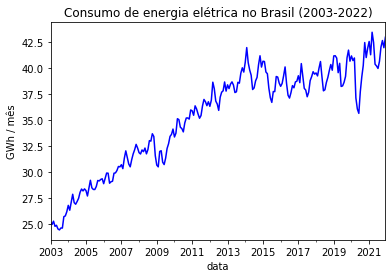

In [3]:
# Plotar dos dados
ax = df['consumo_energia_eletrica_GWh'].plot(color='blue')
# Especificar título para o eixo y (PIB)
ax.set_title('Consumo de energia elétrica no Brasil (2003-2022)')
# Especificar um tótulo para o eixo x
ax.set_xlabel('data')
# Especificar um tótulo para o eixo y (PIB)
ax.set_ylabel('GWh / mês')
# Mostrar gráfico
plt.show()

Além de uma clara tendência de crescimento ao longo do tempo, essa série apresenta flutuações que podem indicar um comportamento sazonal.

### Decomposição

- $y_{t}$ = valor observado em $t$,
- $T_{t}$ = tendência,
- $S_{t}$ = componente sazonal,
- $R_{t}$ = componente residual

> Decomposição aditiva 
$$ y_{t} = T_{t} + S_{t} + R_t$$

> Decomposição multiplicativa
$$ y_{t} = T_{t} \times S_{t} \times R_t $$


A definição do tipo de decomposição depende se a amplitude das flutuações sazonais, ou a variação em torno do ciclo de tendência, dos seus dados é dependente do nível (média).

A decomposição aditiva é a mais adequada se a magnitude das flutuações sazonais não muda com o nível da série temporal. Quando a variação no padrão sazonal parece ser proporcional ao nível da série temporal, então uma decomposição multiplicativa pode ser mais apropriada. Decomposições multiplicativas são comuns com séries temporais econômicas.

Uma alternativa ao uso de uma decomposição multiplicativa é primeiro transformar os dados até que a variação na série pareça estável ao longo do tempo e, em seguida, usar uma decomposição aditiva. Quando uma transformação de log é usada, isso é equivalente a usar uma decomposição multiplicativa uma vez que:

$$y_{t} = T_{t} \times S_{t} \times R_t \quad\text{é equivalente à}\quad
  \log y_{t} = \log T_{t} + \log S_{t} + \log R_t $$

Para realizar a decomposição vamos empregar o método [`seasonal_decompose`](https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html#statsmodels.tsa.seasonal.seasonal_decompose), do módulo **Statsmodels**.

O `seasonal_decompose` realiza a decomposição baseada em médias móveis.

In [4]:
# Importar o método 'seasonal_decompose'
from statsmodels.tsa.seasonal import seasonal_decompose

Apenas como exemplo, vamos aplicar o método `seasonal_decompose` para decompor a série de consumo de energia nos componentes $T_{t}$, $S_{t}$ e $R_{t}$.

In [20]:
# Realizar uma decomposição aditiva
decomp = seasonal_decompose(df['consumo_energia_eletrica_GWh'], 
                            model='additive')

In [32]:
# Realizar uma decomposição multiplicativa
decomp = seasonal_decompose(df['consumo_energia_eletrica_GWh'], 
                            model='multiplicative')

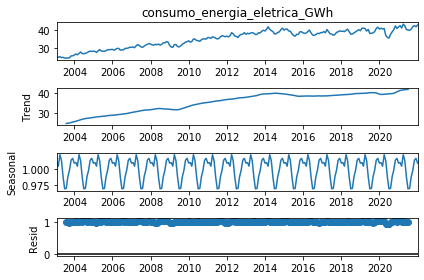

In [33]:
# Gráfico simples
decomp.plot();

Vamos criar uma visualização melhor.

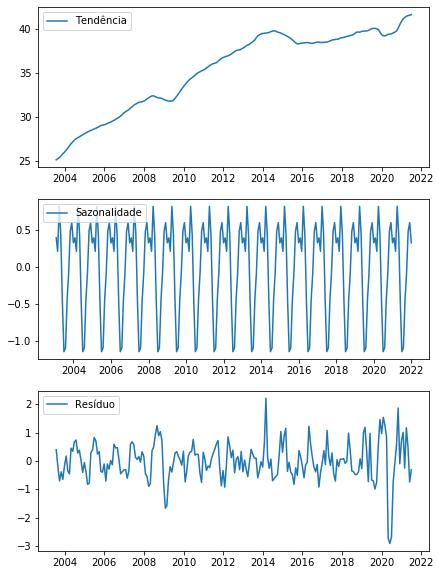

In [22]:
# Plotar os componentes da decomposição
fig, axes = plt.subplots(3,1, figsize=(7,10))

axes[0].plot(decomp.trend, label='Tendência')
axes[0].legend(loc='upper left');

axes[1].plot(decomp.seasonal, label='Sazonalidade')
axes[1].legend(loc='upper left');

axes[2].plot(decomp.resid, label='Resíduo')
axes[2].legend(loc='upper left');

In [34]:
# Adicionar os componentes no DF
df['tendencia'] = decomp.trend
df['sazonalidade'] = decomp.seasonal
df['residuo'] = decomp.resid
df.head(15)

,consumo_energia_eletrica_GWh,tendencia,sazonalidade,residuo,consumo_ajustado
mes_ano,,,,,
2003-01-31,25.152,NaN,1.009774,NaN,24.759825
2003-02-28,24.965,NaN,1.004211,NaN,24.756292
2003-03-31,25.281,NaN,1.022031,NaN,24.462024
2003-04-30,24.787,NaN,1.012965,NaN,24.352410
2003-05-31,24.889,NaN,0.987402,NaN,25.360533
2003-06-30,24.535,NaN,0.969130,NaN,25.685788
2003-07-31,24.443,25.151292,0.969770,1.002133,25.542484
2003-08-31,24.629,25.277000,0.988007,0.986192,25.076586
2003-09-30,24.621,25.409750,0.997882,0.971016,24.709494


### Dados ajustados sazonalmente

Se o componente sazonal for removido dos dados originais, os valores resultantes são os dados “ajustados sazonalmente”. Para uma decomposição aditiva, os dados dessazonalizados são dados por $y_t - S_t$, e para dados multiplicativos, os valores dessazonalizados são obtidos fazendo $y_t / S_t$.

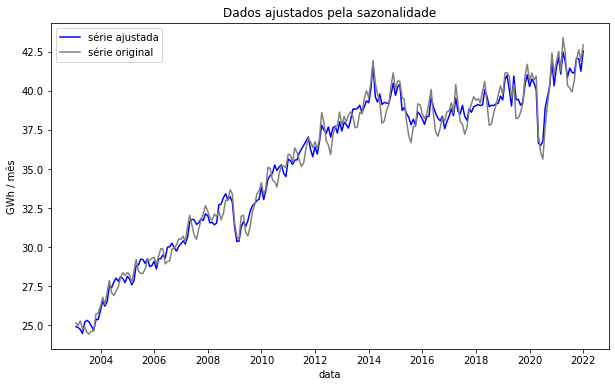

In [35]:
# Computar dados ajustados
df['consumo_ajustado'] = df['consumo_energia_eletrica_GWh']/ df['sazonalidade']

# Plotar dos dados
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df['consumo_ajustado'], color='blue', label="série ajustada")
ax.plot(df['consumo_energia_eletrica_GWh'], color='grey', label="série original")
# Especificar título para o eixo y
ax.set_title('Dados ajustados pela sazonalidade')
# Especificar um rótulo para o eixo x
ax.set_xlabel('data')
# Especificar um rótulo para o eixo y
ax.set_ylabel('GWh / mês')
# Inserir legenda
ax.legend(loc='best')
# Mostrar gráfico
plt.show()